In [2]:
# Install nltk
# If you are using Windows or Linux or Mac, you can install NLTK using pip:
# $ pip install nltk
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# Here we will learn how to identify what the web page is about using NLTK in Python
# First, we will grab a webpage and analyze the text to see what the page is about.
# urllib module will help us to crawl the webpage
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
print(html)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"133463a8-a83e-4c56-9087-412438dde077","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1025785206,"wgRevisionId":1025785206,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short description matches Wikidata","Use American English from August 2019","All Wikipedia articles written in A

In [4]:
# We will use Beautiful Soup which is a Python library for pulling data out of HTML and XML files. 
# We will use beautiful soup to clean our webpage text of HTML tags.
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

SpaceX - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"133463a8-a83e-4c56-9087-412438dde077","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1025785206,"wgRevisionId":1025785206,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles with short description","Short description matches Wikidata","Use American English from August 2019","All Wikipedia articles written in American English","Use dmy dates from September 2020","Coordinates not on Wikidata",
"Pages using infobox company using tradin

In [5]:
# Now we have clean text from the crawled web page, let’s convert the text into tokens.
tokens = [t for t in text.split()]
print(tokens)

['SpaceX', '-', 'Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"133463a8-a83e-4c56-9087-412438dde077","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1025785206,"wgRevisionId":1025785206,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive', 'template', 'wayback', 'links","Articles', 'with', 'short', 'description","Short', 'description', 'matches', 'Wikidata","Use', 'American', 'English', 'from', 'August', '2019","All', 'Wikipedia', 'articles', 'written', 'in', 'American', 'English","Use', 'dmy', 'dates', 'from', 'Septembe

In [6]:
# Count word Frequency
# nltk offers a function FreqDist() which will do the job for us. 
# Also, we will remove stop words (a, at, the, for etc) from our web page 
# as we don't need them to hamper our word frequency count. 

from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

SpaceX:141
-:4
Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"133463a8-a83e-4c56-9087-412438dde077","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":1025785206,"wgRevisionId":1025785206,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive:1
template:2
wayback:2
links","Articles:1
short:3
description","Short:1
description:2
matches:2
Wikidata","Use:1
American:7
English:2
August:38
2019","All:1
Wikipedia:4
articles:24
written:2
English","Use:1
dmy:2
dates:2
September:29
2020","Coordinates:1
Wikidata",:1
"Pages:1
using:7
infob

andRP-1propellants:1
agas-generator:1
power:3
cycle.:1
Merlin:3
1's:1
stage,:2
stages:3
engine:11
apintleinjector:1
provides:1
deep-throttle:1
landings.:1
Propellants:1
fed:1
via:1
shaft,:1
dual:1
impellerturbopump.Kestrel:1
LOX/RP-1pressure-fedrocket:1
main:1
engine.:1
built:3
pintle:1
architecture:1
aturbopump,:1
isfed:1
tank:1
pressure.:1
isablatively:1
cooledin:1
chamber:1
throat,:1
isradiatively:1
cooledon:1
exhaust:1
nozzle.:1
Kestrel's:1
nozzle:1
fabricated:1
high:2
strengthniobiumalloy.Draco:1
ahypergolicliquid-propellant:1
utilizesmonomethyl:1
hydrazinefuelandnitrogen:1
tetroxideoxidizer.:1
Each:2
Draco:2
thruster:1
generates:1
400:1
N:1
(90:1
lbf):2
thrust.[95]They:1
theDragonandDragon:1
2spacecraft.[96]SuperDracois:1
hypergolic:1
liquid-propellant:1
that,:1
like:3
Draco,:1
usesmonomethyl:1
hydrazineandnitrogen:1
tetroxidepropellants.:1
Eight:1
SuperDraco:3
providelaunch:1
capabilityfor:1
scenario.:1
produces:1
73:1
kN:1
(16,000:1
thrust.:1
Initial:2
perform:2
retropropulsive

slump:1
domestic,:1
military,:1
spy:1
ULA:5
go:1
unless:1
orders.[198]To:1
end,:1
restructuring:2
processes:1
half.[199][200]Congressional:1
testimony:1
suggested:1
NASASpace:1
Agreementprocess:1
"setting:1
high-level:1
requirement:1
[while]:1
leaving:2
details:1
industry":1
substantially:1
According:1
independently:1
verified:2
numbers,:1
US$390:1
million.:3
2011:2
agency:1
US$4:1
upon:1
contracting:1
processes,:1
more.[161]In:1
administratorJim:1
Bridenstineremarked:1
thanks:1
investments:1
70%:1
market,:1
improvement:1
country.[201]Board:1
directors[edit]SpaceXboard:1
directorsas:1
2021[202]Joined:1
BoardNameTitles2002[203]Elon:1
MuskFounder,:1
Chairman,:1
CEO:3
SpaceX;:1
CEO,Product:1
Architect,:1
former:3
Chairman:3
ofTesla;:1
ofSolarCity[203]2002[204]Kimbal:1
MuskBoard:1
member,:1
Tesla[205]2009[206]Gwynne:1
ShotwellPresident:1
COO:2
SpaceX[207]2009[206]Luke:1
NosekCo-founder,:1
PayPal[208]2009[206]Steve:1
JurvetsonCo-founder,:1
Future:4
Ventures:1
fund[209]2010[210]Antonio:1
Gra

unexpected:1
ruin:1
night:1
sky".:1
Economist.Archivedfrom:1
June2019.^"SpaceX's:1
Could:2
Change:1
Night:1
Forever,:1
And:1
Astronomers:1
Are:1
Not:1
Happy".Forbes.Archivedfrom:1
June2019.^"Will:1
harm:1
astronomy?:1
Here's:2
know".:1
nationalgeographic.com.Archivedfrom:1
March2021.^SpaceX:1
2020)."Astronomy:1
Discussion:1
Academy:1
Sciences".Archivedfrom:1
April2021.^O'Callaghan,:1
2019)."SpaceX's:2
Cause:1
Cascades:1
Junk".Scientific:1
American.Archivedfrom:1
August2020.^Does:1
Pose:1
Debris:1
Threat?:1
An:1
Expert:1
Answers.Archived17:1
MachineJan:1
Hattenbach,Sky:1
Telescope,:1
2019^Alan:1
Boyle:1
Plans:1
Hyperloop:4
Pod:3
Races:1
NBC.Archivedfrom:1
March2017.^"Spacex:1
Competition"(PDF).:1
March2017.^Bonasio,:1
Alice:1
2018)."Is:1
seriously?".Ars:1
April2021.^Etherington,:1
Darrell:2
2019)."Team:1
TUM:1
Competition:1
288:1
mph:1
speed".TechCrunch.Archivedfrom:1
April2021.^Krouse,:1
Sarah:1
got:1
4,000:1
workers:1
join:1
study.:1
learned".Wall:1
February2021–:1
viafoxbusiness.com.

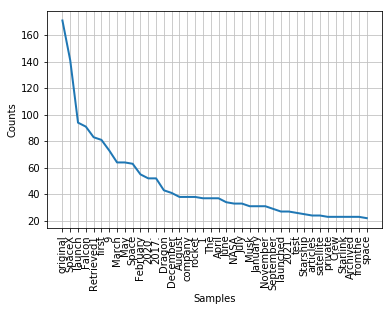

In [8]:
# We will plot the graph for most frequently occurring words in the webpage in order 
# to get the clear picture of the context of the web page

freq.plot(40, cumulative=False)